<a href="https://colab.research.google.com/github/Jeniejean/ML/blob/main/ML_6610422019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [9]:
import pandas as pd
import numpy as np

#อาจารย์ให้โจทย์มาสามอย่างคือหา ML regression model และทดสอบ MSE กับ testset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

**2. Import Data**

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/Jeniejean/ML/main/as_ml.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**3. Clean data**

In [15]:
df.isnull()
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [22]:
df_a = df
#print(df_a)

df_a = df_a.replace({'mainroad':{'yes':1,'no':0},
                     'guestroom':{'yes':1,'no':0},
                     'basement':{'yes':1,'no':0},
                     'hotwaterheating':{'yes':1,'no':0},
                     'airconditioning':{'yes':1,'no':0},
                     'prefarea':{'yes':1,'no':0},
                     'furnishingstatus':{'furnished':1,'semi-furnished':0.5,'unfurnished':0}
                     })
print(df_a)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

**4. เริ่มเลอ**
*   กำหนดแกนx(ตัวแปรอิสระ),y(ตัวแปรตาม(ราคา))
*   แบ่งข้อมูลออกเป็นสองส่วน คือ train80%, test20%







In [24]:
x = df_a.loc[:,'area':'furnishingstatus']
y = df_a['price']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=100)



*   เทรนโมเดล
*   test
*   หาค่าสัมประสิทธิ์ (Coefficients)
*   หาค่าตัดแกน y (Intercept)





In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

y_predict = model.predict(x_test)

c = model.coef_

i = model.intercept_

print('ค่าy_predict: ',y_predict)
print('ค่าสัมประสิทธิ์ (Coefficients): ',c)
print('ค่าตัดแกน y (Intercept): ',i)

ค่าy_predict:  [3909079.36337596 6664207.45687046 5533066.52012758 5165501.9983135
 4736760.95379701 3850890.41214154 8238481.43649973 5683903.46232367
 3534290.68073711 5763202.24873778 2897586.32777537 6397036.95721688
 4735540.96607786 7299886.01899918 5738455.81897481 6819934.74319817
 8331545.18404021 4345424.87277818 6135133.17038379 5037840.66117759
 4315070.27799247 2776480.66522138 4675383.15592278 3560379.60189054
 2724254.14611633 3497655.19828845 5120118.13709642 6650721.50133493
 6717960.70175182 4926506.90699322 3000044.70131413 4471629.07413724
 3038988.37752921 2772974.79907463 4756127.09540633 4728716.55961087
 4692468.04819259 3380459.1874572  3490315.84867766 4241810.95200957
 3057095.56926713 5968492.54136357 5917322.34681702 2970899.58344937
 2661435.31741679 4424350.62486814 4556681.15760607 5272803.69272726
 3197963.28247013 6146362.19206376 2018611.00158591 6580176.22464148
 5937462.01920249 6440358.30795622 7129424.52229285 5015737.36200267
 6101953.9629374  28

5. **Find** **mean** **squared**
*   วัดความแม่นยำของโมเดล(ค่า MSE ที่ต่ำหมายถึงความคลาดเคลื่อนระหว่างค่าทำนายและค่าจริงที่ต่ำ ซึ่งบ่งบอกว่าโมเดลทำนายค่าได้ใกล้เคียงกับค่าจริงมาก. ในทางกลับกัน, ค่า MSE ที่สูงหมายถึงความคลาดเคลื่อนที่สูง, บ่งบอกว่าโมเดลมีความแม่นยำน้อย)

In [33]:
mse = mean_squared_error(y_test, y_predict)

print(f"Mean Squared Error:, {mse:,.4f}")

Mean Squared Error:, 1,142,383,874,558.4380


**6**.**Plot** **graph**

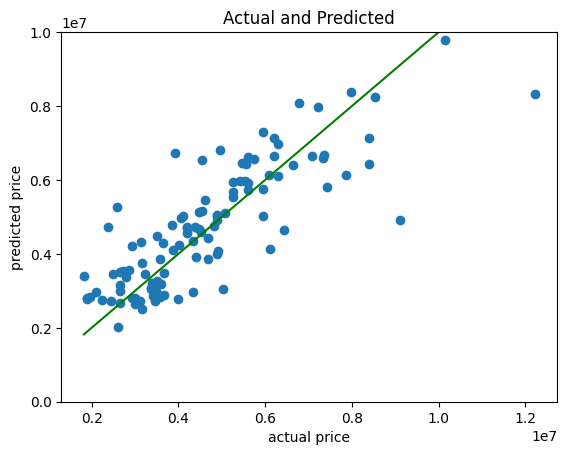

In [42]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_predict) #สร้าง scatter plot โดยใช้ค่าจาก y_test เป็นแกน X (ค่าที่จริง) และ y_predict เป็นแกน Y (ค่าที่ถูกทำนาย)
plt.title('Actual and Predicted') #ชื่อกราฟ
plt.xlabel('actual price') #ชื่อแกนx
plt.ylabel('predicted price') #ชื่อแกนy

x_axes = np.linspace(min(y_test),max(y_test),50) #สร้างจุดข้อมูลจากค่าต่ำสุดของy_testไปยังค่าสูงสุด ทั้งหมด50จุด
y_axes = x_axes #สร้างเส้นความสัมพันธ์ของค่าจริงและค่าทำนาย

plt.plot(x_axes, y_axes, color='green') #วาดเส้นโดยใช้ค่าจาก x_axes และ y_axes
plt.ylim(0, 1.0e7) #กำหนดขอบเขตของแกน Y ให้มีค่าตั้งแต่ 0 ถึง 10,000,000
plt.show()

**7. Deploy**